<a href="https://colab.research.google.com/github/Ghazaleh99/ocr/blob/main/ANN_HW2_150901012_Hamzeh_mlp_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW2 - Neural Networks

##MLP Comparison of optical character recognition


---



**Ghazaleh Hamzeh** 

**150901012**

##Step 1 - Import the libraries

In [ ]:
%pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 3.5 MB/s 


In [ ]:
# Package imports
import os
import patoolib
import numpy as np
import matplotlib.pyplot as plt

##Step 2 - Setting up the Data

In [ ]:
patoolib.extract_archive("SimpleOCR-TrainSetHW1.rar")
patoolib.extract_archive("SimpleOCR-TestSetHW1.rar")

patool: Extracting SimpleOCR-TrainSetHW1.rar ...
patool: running /usr/bin/unrar x -- /content/SimpleOCR-TrainSetHW1.rar
patool:     with cwd='./Unpack_4bsh61oe'
patool: ... SimpleOCR-TrainSetHW1.rar extracted to `TrainSetHW1'.
patool: Extracting SimpleOCR-TestSetHW1.rar ...
patool: running /usr/bin/unrar x -- /content/SimpleOCR-TestSetHW1.rar
patool:     with cwd='./Unpack_qic5_19x'
patool: ... SimpleOCR-TestSetHW1.rar extracted to `TestSetHW1'.


'TestSetHW1'

In [ ]:
def read_files(path):
  dic = {}
  os.chdir(path) # Change the directory
  for file in os.listdir(): # iterate through all file
    if file.endswith('.txt'): 
        file_path = f'{path}/{file}'
        my_file = open(file_path, "r")
        data = my_file.read()
        data = data.split('\n')
        dic[file] = data
  return dic

In [ ]:
# Folder Path
path_test = "/content/TestSetHW1"
dict_test = read_files(path_test)

path_train = "/content/TrainSetHW1"
dict_train = read_files(path_train) 

##Step 3 - Splitting the Data

In [ ]:
def convert2npArray(dict_data):
  xlist, ylist = [], []
  for i in dict_data.keys():
    ylist.append(i[0])
    tmp = []
    for j in dict_data[i]:
      tmp += j
    xlist.append(tmp)

  x = np.array(xlist)
  y = np.array(ylist)
  y = y.reshape(21,1)
  return x.T, y.T

In [ ]:
train_x, train_y = convert2npArray(dict_train)
print('__________________train___________________')
print(train_x.shape, train_y.shape)
print(train_x[1])
print(train_y)

__________________train___________________
(63, 21) (1, 21)
['#' '.' '#' '#' '.' '.' '#' '.' '.' '.' '#' '#' '.' '#' '.' '.' '#' '#'
 '#' '.' '#']
[['D' 'J' 'B' 'K' 'C' 'K' 'K' 'C' 'A' 'J' 'B' 'E' 'A' 'E' 'J' 'C' 'E' 'D'
  'D' 'A' 'B']]


In [ ]:
test_x, test_y = convert2npArray(dict_test)
print('__________________test___________________')
print(test_x.shape, test_y.shape)
print(test_x[1])
print(test_y)

__________________test___________________
(63, 21) (1, 21)
['#' '.' '#' 'o' '.' '.' '#' '.' '.' '.' '#' '#' '.' '#' '.' '.' '#' '#'
 '#' '.' '#']
[['D' 'J' 'B' 'K' 'C' 'K' 'K' 'C' 'A' 'J' 'B' 'E' 'A' 'E' 'J' 'C' 'E' 'D'
  'D' 'A' 'B']]


binary classification -> because of sigmoid activation function 

In [ ]:
def target2vec(y_tag):
  classes = {
      'A' : [1,0,0,0,0,0,0],
      'B' : [0,1,0,0,0,0,0],
      'C' : [0,0,1,0,0,0,0],
      'D' : [0,0,0,1,0,0,0],
      'E' : [0,0,0,0,1,0,0],
      'J' : [0,0,0,0,0,1,0],
      'K' : [0,0,0,0,0,0,1] 
      }
  y_vec = []
  for i in range(y_tag.shape[1]):
    if y_tag[0][i] in classes.keys():
      y_vec.append(classes[y_tag[0][i]])
  y = np.array(y_vec)
  return y.T

In [ ]:
train_y_vec = target2vec(train_y)
test_y_vec = target2vec(test_y)
print(train_y_vec.shape, test_y_vec.shape)
print(train_y_vec)

(7, 21) (7, 21)
[[0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
def convert2vec(char_pix):
  tmp2 = []
  for i in char_pix:
    tmp = []
    for j in i:
      for k in j:
        if k == '.':
          tmp.append(-1)
        elif k == '#':
          tmp.append(1)
        else:
          tmp.append(0.75)
    tmp2.append(tmp)
  char2vec = np.array(tmp2)
  return char2vec

In [ ]:
train_x_vec = convert2vec(train_x)
print(train_x_vec.shape)
print(train_x_vec)

(63, 21)
[[ 1 -1  1 ...  1 -1  1]
 [ 1 -1  1 ...  1 -1  1]
 [ 1 -1  1 ...  1  1  1]
 ...
 [ 1  1  1 ...  1  1  1]
 [-1 -1  1 ... -1  1  1]
 [-1 -1 -1 ... -1  1 -1]]


In [ ]:
test_x_vec = convert2vec(test_x)
print(test_x_vec.shape)
print(test_x_vec)

(63, 21)
[[ 0.75 -1.    1.   ...  1.   -1.    1.  ]
 [ 1.   -1.    1.   ...  1.   -1.    1.  ]
 [ 1.   -1.    1.   ...  1.    1.    1.  ]
 ...
 [ 1.    1.    1.   ...  1.    1.    1.  ]
 [-1.   -1.    1.   ... -1.    0.75  1.  ]
 [-1.   -1.   -1.   ... -1.    1.   -1.  ]]


##Step 4 - Train 

### 4.1 - Defining the neural network structure ####

layers and learning rate

Function `layer_sizes()`

    Arguments:
    X -- input dataset - shape (input size, number of examples)
    Y -- target - shape (output size, number of examples)
    n_h -- number of neurons in the hidden layer
    
    Returns:
    n_x -- input layer units
    n_h -- hidden layer units
    n_y -- output layer units

In [ ]:
def layer_sizes(X, n_h, Y):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    n_h = n_h
    return (n_x, n_h, n_y)

In [ ]:
# hidden_layer_units = (train_x_vec.shape[0] + train_y_vec.shape[0]) // 2
# (n_x, n_h, n_y) = layer_sizes(train_x_vec, train_y_vec)
# learning_rate = 0.01
# print('The learning rate is:', learning_rate)
# print('The size of the input layer is:', n_x)
# print('The size of the hidden layer is:', n_h)
# print('The size of the output layer is:', n_y)

### 4.2 - Initialize the model's parameters ####
Function `initialize_parameters()`

    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- a dictionary for parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
   

In [ ]:
def initialize_parameters(n_x, n_h, n_y, a, b):
    # W1 = np.random.randn(n_h,n_x) * 0.01
    # b1 = np.zeros((n_h,1)) * 0.01
    # W2 = np.random.randn(n_y,n_h) * 0.01
    # b2 = np.zeros((n_y,1)) * 0.01

    W1 = np.random.randn(n_h,n_x) * a
    b1 = np.random.randn(n_h,1) * b
    W2 = np.random.randn(n_y,n_h) * a
    b2 = np.random.randn(n_y,1) * b

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [ ]:
# np.random.seed(2)
# parameters = initialize_parameters(n_x, n_h, n_y)

# print('W1', parameters["W1"].shape)
# print('b1', parameters["b1"].shape)
# print('W2', parameters["W2"].shape)
# print('b2', parameters["b2"].shape)

### 4.3 - Activation Function (sigmoid)
Function `forward_propagation()`

    Argument:
    X -- input
    
    Returns:
    sigmoid(x)

In [ ]:
def sigmoid(x):
  s = 1/(1+np.exp(-x))    
  return s

### 4.4 - Forward_propagation
two layers -> two activation functions

I used sigmoid for the output layer beacuse it's between 0 and 1
which is great for classification.
And for hidden layer I used tanh which is bipolar and efficent on distinguishing the input values.

#### 4.4.1 - Forward_propagation
Function `forward_propagation()`


    Argument:
    X -- input data of size (n_x, m)
    parameters -- dictionary of parameters
    
    Returns:
    A2 -- The sigmoid output of the output layer
    cache -- a dictionary : "Z1", "A1", "Z2", "A2"

In [ ]:
def forward_propagation(X, parameters):

  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  Z1 = np.dot(W1,X) + b1
  A1 = np.tanh(Z1)
  Z2 = np.dot(W2,A1) + b2
  A2 = sigmoid(Z2)
  
  cache = {"Z1": Z1,
            "A1": A1,
            "Z2": Z2,
            "A2": A2}
  
  return A2, cache

In [ ]:
# A2, cache = forward_propagation(train_x_vec, parameters)
# print('A2 = ', A2.shape)

#### 4.4.2 - Cost Function

Function `cost_func()`

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)}$$

    Arguments:
        A2 -- The sigmoid output of the second activation
        Y -- Target 

    Returns:
      cost

In [ ]:
def cost_func(A2, Y):
  c = []
  m = Y.shape[1] # number of examples
  for i in range(Y.shape[0]):
    logprobs = np.multiply(Y[i] ,np.log(A2[i])) + np.multiply((1-Y[i]), np.log(1-A2[i]))
    cost = (-1/m) * np.sum(logprobs)
    c.append(cost)
  return np.array(c)

In [ ]:
def MSE_loss(self, A2):
  c = []
  for i in range(self.Y.shape[0]):
    squared_errors = (A2[i] - self.Y[i]) ** 2
    Loss = np.sum(squared_errors)
    c.append(Loss)
  return np.array(c)

In [ ]:
# cost = cost_func(A2, train_y_vec)
# print(A2[0])
# print(train_y_vec[0])
# print('cost = ', cost)

### 4.5 - Implement Backpropagation

function `backward_propagation()`


    Arguments:
      parameters -- dictionary of parameters 
      cache -- dictionary "Z1", "A1", "Z2", "A2".
      X -- input data - shape (64, 21)
      Y -- targets vector - shape (7, 21)
    
    Returns:
      grads -- dictionary of gradients

In [ ]:
def backward_propagation(parameters, cache, X, Y):
  m = X.shape[1] # number of examples
  
  W1 = parameters["W1"]
  W2 = parameters["W2"]

  A1 = cache["A1"]
  A2 = cache["A2"]

  dZ2 = A2 - Y # sigmoid(z2) - y
  dW2 = (1/m) * np.dot(dZ2,A1.T)
  db2 = (1/m) *(np.sum(dZ2,axis=1,keepdims=True)) # making sure the vector shape is ok
  dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2)) # dz1 = w2 * dz2 * tanh'(z1) = w2*(a2-y)a1(1-a1)
  dW1 = (1/m) *(np.dot(dZ1,X.T))
  db1 = (1/m) *(np.sum(dZ1, axis=1, keepdims=True))
  
  grads = { "dW1": dW1,
            "db1": db1,
            "dW2": dW2,
            "db2": db2}
  return grads

In [ ]:
# grads = backward_propagation(parameters, cache, train_x_vec, train_y_vec)
# print ('dW1 = ', grads["dW1"])
# print ('db1 = ', grads["db1"])
# print ('dW2 = ', grads["dW2"])
# print ('db2 = ', grads["db2"])

### 4.6 - Update Parameters 
Function `update_parameters()`
    
    Arguments:
      parameters -- dictionary containing parameters 
      grads -- dictionary containing gradients 
      learning rate
    
    Returns:
      parameters -- dictionary containing updated parameters 

$$w = w - \alpha \frac{\partial E }{ \partial \theta }$$

In [ ]:
def update_parameters(parameters, grads, learning_rate):
  W1 = parameters["W1"].copy()
  b1 = parameters["b1"]
  W2 = parameters["W2"].copy()
  b2 = parameters["b2"]

  dW1 = grads["dW1"]
  db1 = grads["db1"]
  dW2 = grads["dW2"]
  db2 = grads["db2"]

  W1 = W1 - learning_rate * dW1
  b1 = b1 - learning_rate * db1
  W2 = W2 - learning_rate * dW2
  b2 = b2 - learning_rate * db2
  
  param = {"W1": W1,
            "b1": b1,
            "W2": W2,
            "b2": b2}
  return param

In [ ]:
# parameters = update_parameters(parameters, grads, learning_rate)
# print('W1 shape', parameters["W1"].shape)
# print('b1 shape', parameters["b1"].shape)
# print('W2 shape', parameters["W2"].shape)
# print('b2 shape', parameters["b2"].shape)

### 4.7 - Error rate

Function `error_rate()`

    Argument:
      y_vec -- target
      predict_list -- predicton after train

    Returns:
      error rate

$$\\Error = 100 * \frac{\\Wrong\\predicts}{\\all }$$

In [ ]:
def error_rate(y_vec, predict_list):
  y_vec = y_vec.T
  predict = np.array(predict_list)
  sum = 0
  for i in range(y_vec.shape[0]):
    if not np.array_equal(y_vec[i], predict[i]):
      sum += 1
  return (sum / y_vec.shape[0]) * 100

In [ ]:
# error = error_rate(train_y_vec, predic)
# print(error)

### 4.9 - Plot error-iteration while Training 

Function `plot_error()`

    Arguments:
      err_l -- error list (list of error per iteration)
      name -- number of neourns in hidden layer and the learning rate



In [ ]:
def plot_error(err_l, name):
  # plt.rcParams["figure.figsize"] = [100, 750]
  # plt.rcParams["figure.autolayout"] = True
  plt.plot(err_l, label = name)
  plt.xlabel('iterations')
  plt.ylabel('error')
  plt.title('Train')
  plt.legend()
  plt.show()

### 4.8 - Train using above functions

Function `mlp_train_model()`

    Arguments:
      X -- dataset
      Y -- labels
      nh -- number of neurons in the hidden layer
      learning_rate 
      num_iterationsp -- number of iterations
      rate -- a,b for weights and bias 
    
    Returns:
      error_list -- list of errors per iteration
      predic -- prediction
      parameters -- best updated parameters!
      

In [ ]:
def mlp_train_model(X, Y, nh, num_iterations, learning_rate, rate):
  np.random.seed(5)
  n_x = layer_sizes(X, nh, Y)[0]
  n_h = layer_sizes(X, nh, Y)[1]
  n_y = layer_sizes(X, nh, Y)[2]
  parameters = initialize_parameters(n_x, n_h, n_y, rate[1], rate[0])
  error_list = [('hidden layer:', n_h), ('learning rate:', learning_rate)]

  for i in range(0, num_iterations):
    A2, cache = forward_propagation(X, parameters)
    cost = cost_func(A2, Y)
    grads = backward_propagation(parameters, cache, X, Y)
    parameters = update_parameters(parameters, grads, learning_rate)    
    predic = []
    A2 = A2.T
    p = A2.max(axis=1)
    max = 0
    for j in range(A2.shape[0]):
      tmp = []
      for k in range(A2.shape[1]):
        if A2[j][k] == p[j]:
          tmp.append(1)
        else:
          tmp.append(0)
      predic.append(tmp)
    error = error_rate(Y, predic)
    error_list.append(error)
    if i%10 == 0:
      print('Error after iteration', i, ':', error)
      print('Cost after iteration', i, ':', cost)
    if error < 1:
      break
  return error_list, predic, parameters

In [ ]:
learning_rate = 0.01
error_list, predic, best_param = mlp_train_model(train_x_vec, train_y_vec, 35, 1000, learning_rate, (0,0.01))


Error after iteration 0 : 90.47619047619048
Cost after iteration 0 : [0.69443937 0.6923166  0.6924012  0.69189467 0.6943796  0.69274274
 0.69510688]
Error after iteration 10 : 71.42857142857143
Cost after iteration 10 : [0.67912377 0.67845593 0.67850008 0.67773703 0.68069494 0.67776835
 0.68092951]
Error after iteration 20 : 42.857142857142854
Cost after iteration 20 : [0.66364519 0.6644502  0.66456189 0.66344866 0.66726668 0.66270634
 0.66691559]
Error after iteration 30 : 38.095238095238095
Cost after iteration 30 : [0.64642885 0.6493259  0.64968741 0.64813534 0.65317272 0.64640999
 0.65180584]
Error after iteration 40 : 52.38095238095239
Cost after iteration 40 : [0.62543257 0.63175591 0.63269728 0.63060556 0.63713977 0.62747021
 0.63388828]
Error after iteration 50 : 66.66666666666666
Cost after iteration 50 : [0.59837512 0.61020416 0.61227067 0.6095167  0.61759519 0.60442846
 0.61108932]
Error after iteration 60 : 76.19047619047619
Cost after iteration 60 : [0.56397027 0.58373176 

##Step 5 - Test

### 5.1 - Predict on testset

Using the learned parameters, predicts a class for each charachter example
    
Function `predict()`

    Arguments:
      parameters -- The paramaters trained on trainset 
      X -- input test data - shape : (number of classes, number of examples)
    
    Returns
      predictions -- [each contains a vector]
      error


In [ ]:
def predict(parameters, X):
  predic = []
  A2, cache = forward_propagation(X, parameters)
  A2 = A2.T
  p = A2.max(axis=1)
  max = 0
  for i in range(A2.shape[0]):
    tmp = []
    for j in range(A2.shape[1]):
      if A2[i][j] == p[i]:
        tmp.append(1)
      else:
        tmp.append(0)
    predic.append(tmp)
  error = error_rate(test_y_vec, predic)
  return predic, error

In [ ]:
predictions, error = predict(best_param, test_x_vec)
print('Predictions:', predictions)
print('Error on testset:', error)

Predictions: [[0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0]]
Error on testset: 0.0


Different Bias and Weight intializing

In [ ]:
rate = [(0,-1),(0,-0.1),(0,0),(0,0.001),(0,0.01),(0,0.1),(0,1),(0,10),
        (-1,-1),(-1,-0.1),(-1,0),(-1,0.001),(-1,0.01),(-1,0.1),(-1,1),(-1,10),
        (1,-1),(1,-0.1),(1,0),(1,0.001),(1,0.01),(1,0.1),(1,1),(1,10),
        (0.1,-1),(0.1,-0.1),(0.1,0),(0.1,0.001),(0.1,0.01),(0.1,0.1),(0.1,1),(0.1,10),
        (0.01,-1),(0.01,-0.1),(0.01,0),(0.01,0.001),(0.01,0.01),(0.01,0.1),(0.01,1),(0.01,10),
        (10,-1),(10,-0.1),(10,0),(10,0.001),(10,0.01),(10,0.1),(10,1),(10,10),
        ]

Initializing different values to Bias and Weights

In [ ]:
# learning_rate = 0.01
# for i in range(len(rate)):
#   ra = rate[i][1]
#   rb = rate[i][0]

#   error_list, predic, best_param = mlp_train_model(train_x_vec, train_y_vec, 35, 1000, learning_rate, rate[i])
#   predictions, error = predict(best_param, test_x_vec)
#   print('b',rb,' w',ra)
#   print('Error on testset:', error)

In [ ]:
# predictions, error = predict(best_param, test_x_vec)
# print('error', error_list[-1])
# print('W1', best_param['W1'])
# print('b1', best_param['b1'])
# print('W2', best_param['W2'])
# print('b2', best_param['b2'])


In [ ]:
error_list1, predic1, best_param1 = mlp_train_model(train_x_vec, train_y_vec, 5, 700, learning_rate, (0,0.01))

error_list2, predic2, best_param2 = mlp_train_model(train_x_vec, train_y_vec, 20, 700, learning_rate, (0,0.01))

error_list3, predic3, best_param3 = mlp_train_model(train_x_vec, train_y_vec, 100, 700, learning_rate, (0,0.01)) #mean

Error after iteration 0 : 76.19047619047619
Cost after iteration 0 : [0.69288796 0.6931538  0.69325988 0.69333084 0.6930256  0.69272109
 0.69281044]
Error after iteration 10 : 57.14285714285714
Cost after iteration 10 : [0.67974726 0.68052719 0.68061678 0.68063204 0.68039289 0.68009644
 0.6799931 ]
Error after iteration 20 : 57.14285714285714
Cost after iteration 20 : [0.66691048 0.66834782 0.66845648 0.66843209 0.66827527 0.66787399
 0.66753149]
Error after iteration 30 : 47.61904761904761
Cost after iteration 30 : [0.65399793 0.65640476 0.65658517 0.6565304  0.65647505 0.65584188
 0.65515419]
Error after iteration 40 : 52.38095238095239
Cost after iteration 40 : [0.64046468 0.64437533 0.64471639 0.64463523 0.64469074 0.64367355
 0.64246193]
Error after iteration 50 : 66.66666666666666
Cost after iteration 50 : [0.62562266 0.63181735 0.63246317 0.63235289 0.63249519 0.63092816
 0.6289411 ]
Error after iteration 60 : 71.42857142857143
Cost after iteration 60 : [0.60888456 0.61828026 0.

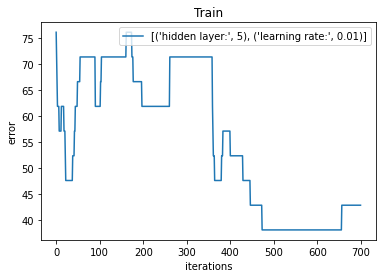

best error for : 5 hidden layer: is 42.857142857142854




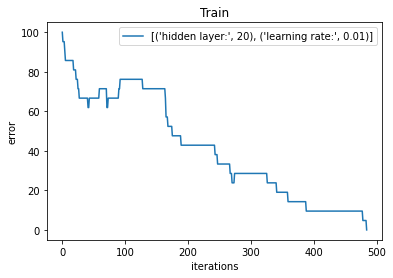

best error for : 20 hidden layer: is 0.0




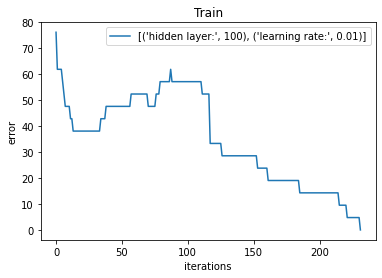

best error for : 100 hidden layer: is 0.0




In [ ]:
plot_error(error_list1[2:], error_list1[0:2])
print('best error for :', error_list1[0][1], error_list1[0][0],'is', error_list1[-1])
print('\n')
plot_error(error_list2[2:], error_list2[0:2])
print('best error for :', error_list2[0][1], error_list2[0][0],'is', error_list2[-1])
print('\n')
plot_error(error_list3[2:], error_list3[0:2])
print('best error for :', error_list3[0][1], error_list3[0][0],'is', error_list3[-1])
print('\n')

Error on testset with the parameters of training

**With diffrent number of neurons in the hidden layer**

In [ ]:
predictions1, error1 = predict(best_param1, test_x_vec)
predictions2, error2 = predict(best_param2, test_x_vec)
predictions3, error3 = predict(best_param3, test_x_vec)

print('error 1 :', error1)
print('error 2 :', error2)
print('error 3 :', error3)

error 1 : 38.095238095238095
error 2 : 0.0
error 3 : 0.0


Plot for error on testset
**learning rate**

In [ ]:
def plot_error_learningrate(error_l):
  # plt.rcParams["figure.figsize"] = [6, 7]
  # plt.rcParams["figure.autolayout"] = True
  x_values = [error_l[0][0], error_l[1][0], error_l[2][0], error_l[3][0]]
  y_values = [error_l[0][1], error_l[1][1], error_l[2][1], error_l[3][1]]
  print(error_l[0][1], error_l[1][1], error_l[2][1], error_l[3][1])

  plt.plot(x_values, y_values, 'bo', linestyle="--", marker='o')
  plt.show()

Different Learning rates

0.9, 0.1, 0.5, 0.01

In [ ]:
error_l = [(),(),(),()]
learning_rate1 = 0.9
error_list10, predic10, best_param10 = mlp_train_model(train_x_vec, train_y_vec, 20, 20, learning_rate1, (0,0.01))
predictions10, error10 = predict(best_param10, test_x_vec)
error_l[0] = (error10, learning_rate1)
print('error 1 :', error_l[0])

Error after iteration 0 : 100.0
Cost after iteration 0 : [0.69359049 0.69344852 0.69288388 0.69297164 0.69220688 0.69295771
 0.69446168]
error 1 : (0.0, 0.9)


In [ ]:
learning_rate2 = 0.5
error_list20, predic20, best_param20 = mlp_train_model(train_x_vec, train_y_vec, 20, 20, learning_rate2, (0,0.01))
predictions20, error20 = predict(best_param20, test_x_vec)
error_l[1] = (error20, learning_rate2)
print('error 2 :', error_l[1])

Error after iteration 0 : 100.0
Cost after iteration 0 : [0.69359049 0.69344852 0.69288388 0.69297164 0.69220688 0.69295771
 0.69446168]
Error after iteration 10 : 9.523809523809524
Cost after iteration 10 : [0.19092167 0.32010694 0.36351682 0.31728568 0.35975967 0.23038288
 0.38128693]
error 2 : (0.0, 0.5)


In [ ]:
learning_rate3 = 0.1
error_list30, predic30, best_param30 = mlp_train_model(train_x_vec, train_y_vec, 20, 20, learning_rate3, (0,0.01)) 
predictions30, error30 = predict(best_param30, test_x_vec)
error_l[2] = (error30, learning_rate3)
print('error 3 :', error_l[2])

Error after iteration 0 : 100.0
Cost after iteration 0 : [0.69359049 0.69344852 0.69288388 0.69297164 0.69220688 0.69295771
 0.69446168]
Error after iteration 10 : 66.66666666666666
Cost after iteration 10 : [0.47535815 0.51180362 0.51892848 0.51534117 0.51048244 0.50432095
 0.496458  ]
error 3 : (42.857142857142854, 0.1)


In [ ]:
learning_rate4 = 0.01
error_list40, predic40, best_param40 = mlp_train_model(train_x_vec, train_y_vec, 20, 20, learning_rate4, (0,0.01)) 
predictions40, error40 = predict(best_param40, test_x_vec)
error_l[3] = (error40, learning_rate4)
print('error 4 :', error_l[3])

Error after iteration 0 : 100.0
Cost after iteration 0 : [0.69359049 0.69344852 0.69288388 0.69297164 0.69220688 0.69295771
 0.69446168]
Error after iteration 10 : 85.71428571428571
Cost after iteration 10 : [0.67970735 0.68026599 0.67961559 0.67943478 0.67824021 0.67875818
 0.68070179]
error 4 : (80.95238095238095, 0.01)


0.9 0.5 0.1 0.01


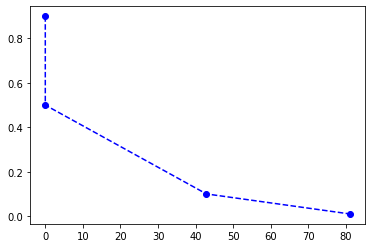

In [ ]:
plot_error_learningrate(error_l)